In [1]:
import pandas as pd
import numpy as np
import json
import yaml
import scikit_posthocs as sp
from scipy import stats

from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedFormatter, FixedLocator

from scipy.stats import wilcoxon, friedmanchisquare, rankdata
from Orange.evaluation import compute_CD, graph_ranks

import pickle

In [4]:
with open('rankings_by_rank_aggreg.pickle', 'rb') as file:
    dico_ranks = pickle.load(file)

In [53]:
dummy_methods = ['random', 'sobel', 'gaussian']

true_methods = ['integratedgrad','smoothgrad','guidedbackprop','rise','gradcam',
                'scorecam','layercam','polycam', 'cameras']#, 'extremal_perturbation']

methods = ['integratedgrad', 'smoothgrad', 'guidedbackprop', 'rise', 'gradcam',
           'scorecam', 'layercam', 'random', 'sobel', 'gaussian', 'polycam',
           'cameras']#, 'extremal_perturbation']

metrics = [
    'Monotonicity Nguyen',
    'Faithfulness Estimate',
    'Faithfulness Correlation',
    'Selectivity',
    'Pixel-Flipping',
    'Monotonicity Arya',
    'Avg-Sensitivity',
    'Max-Sensitivity',
    'Local Lipschitz Estimate',
    'Model Parameter Randomisation',
    'Random Logit',
    'EffectiveComplexity',
    'Complexity',
    'Sparseness'
]

## ResNet50

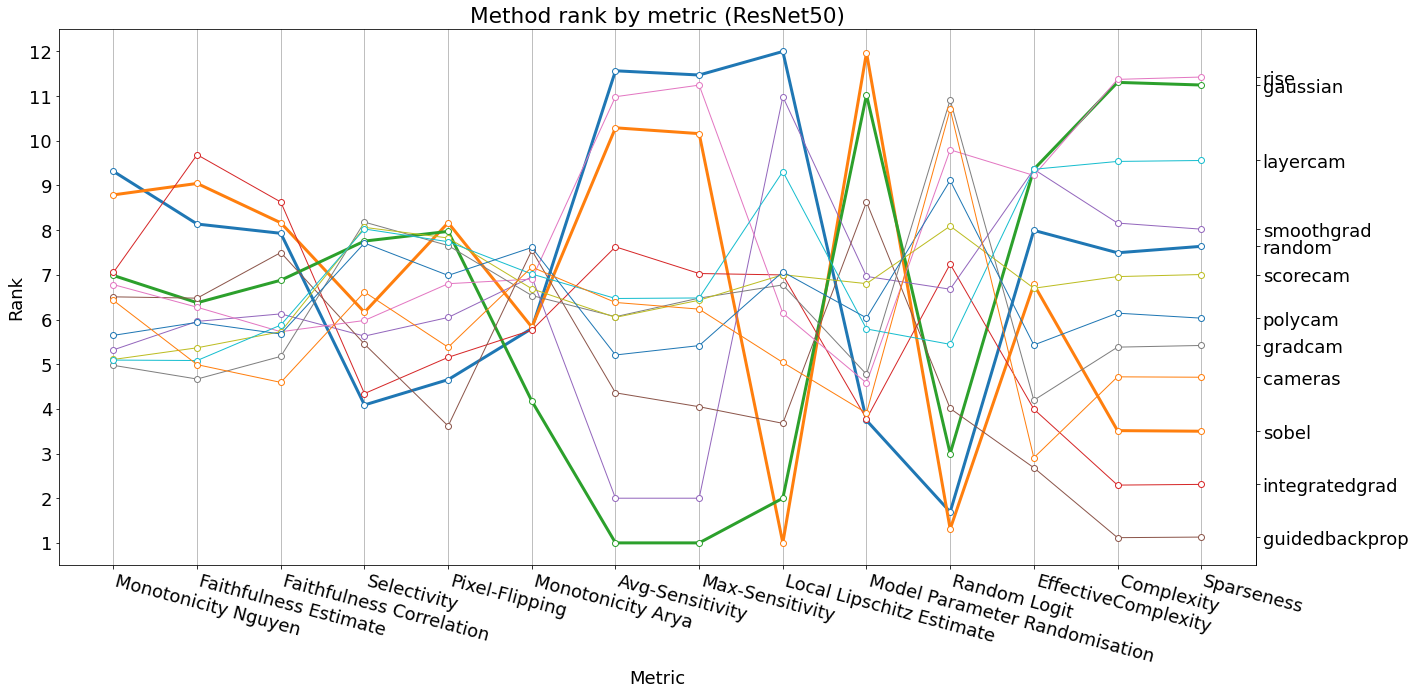

In [54]:
df_ranks = pd.DataFrame(dico_ranks['imagenet']['resnet50'], index=methods)
metrics_with_baselines = sorted(dico_ranks['imagenet']['resnet50'].keys())

columns_renaming_dict = {
    'Monotonicity Nguyen with baseline_black':'Monotonicity Nguyen',
    'Faithfulness Estimate with baseline_black':'Faithfulness Estimate',
    'Faithfulness Correlation with baseline_black':'Faithfulness Correlation',
    'Monotonicity Arya with baseline_black':'Monotonicity Arya',
    'Pixel-Flipping with baseline_black':'Pixel-Flipping',
    'Selectivity with baseline_black':'Selectivity'
}

df_ranks.rename(columns=columns_renaming_dict, inplace=True)
df_ranks_sorted = df_ranks[metrics]

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(ylim=(0.5, len(methods) + 0.51)))

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))

yax2 = ax.secondary_yaxis("right")
yax2.yaxis.set_major_locator(FixedLocator(df_ranks_sorted[df_ranks_sorted.columns[-1]].to_list()))
yax2.yaxis.set_major_formatter(FixedFormatter(df_ranks_sorted.index))

plt.rcParams['font.size'] = '18'

transposed = df_ranks_sorted.transpose()

ax.plot(transposed[dummy_methods] ,"o-",mfc="w", linewidth = 3)
ax.plot(transposed[true_methods] ,"o-",mfc="w", linewidth = 1)

plt.xticks(rotation=-15, ha='left')
ax.set(xlabel="Metric", ylabel="Rank", title="Method rank by metric (ResNet50)")
ax.grid(axis="x")

plt.tight_layout()

plt.savefig('./results/rank_bump_plot_resnet50.eps', format='eps')

## VGG16

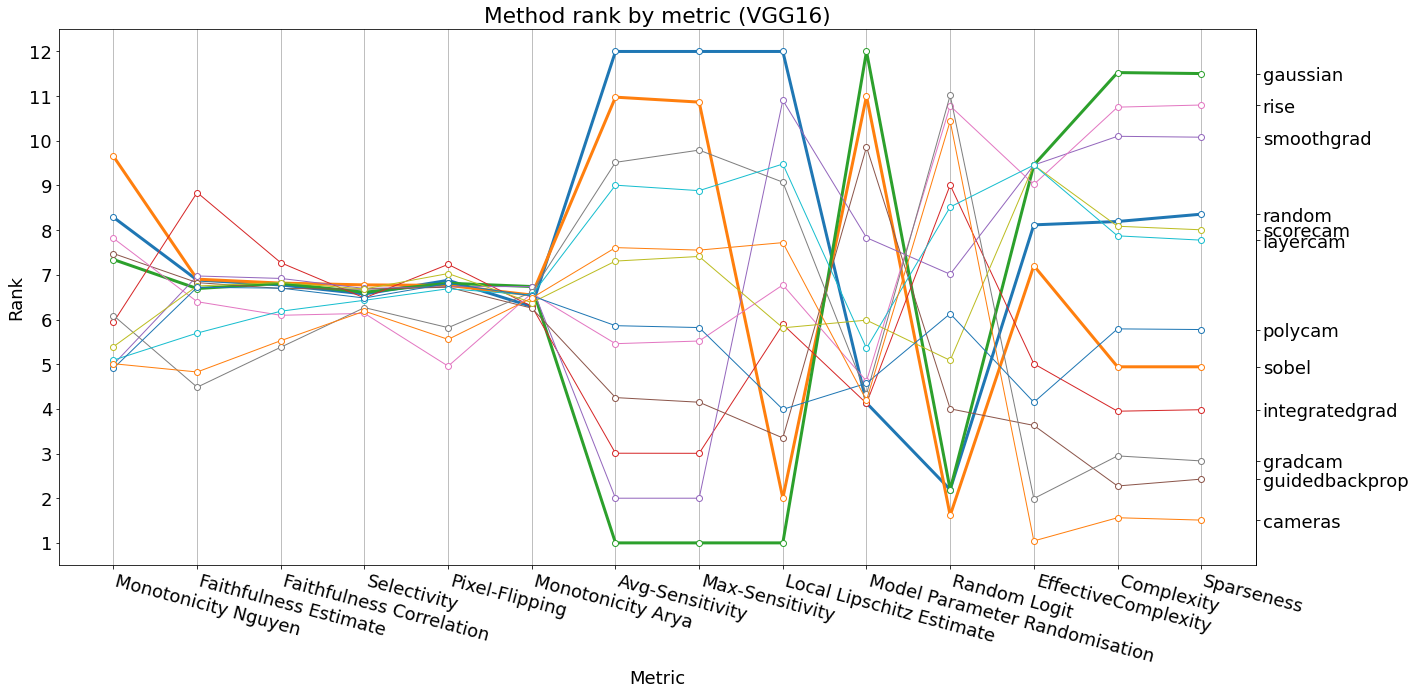

In [58]:
df_ranks = pd.DataFrame(dico_ranks['imagenet']['vgg16'], index=methods)
metrics_with_baselines = sorted(dico_ranks['imagenet']['vgg16'].keys())

columns_renaming_dict = {
    'Monotonicity Nguyen with baseline_black':'Monotonicity Nguyen',
    'Faithfulness Estimate with baseline_black':'Faithfulness Estimate',
    'Faithfulness Correlation with baseline_black':'Faithfulness Correlation',
    'Monotonicity Arya with baseline_black':'Monotonicity Arya',
    'Pixel-Flipping with baseline_black':'Pixel-Flipping',
    'Selectivity with baseline_black':'Selectivity'
}

df_ranks.rename(columns=columns_renaming_dict, inplace=True)
df_ranks_sorted = df_ranks[metrics]

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(ylim=(0.5, len(methods) + 0.51)))

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))

yax2 = ax.secondary_yaxis("right")
yax2.yaxis.set_major_locator(FixedLocator(df_ranks_sorted[df_ranks_sorted.columns[-1]].to_list()))
yax2.yaxis.set_major_formatter(FixedFormatter(df_ranks_sorted.index))

plt.rcParams['font.size'] = '18'

transposed = df_ranks_sorted.transpose()

ax.plot(transposed[dummy_methods] ,"o-",mfc="w", linewidth = 3)
ax.plot(transposed[true_methods] ,"o-",mfc="w", linewidth = 1)

plt.xticks(rotation=-15, ha='left')
ax.set(xlabel="Metric", ylabel="Rank", title="Method rank by metric (VGG16)")
ax.grid(axis="x")

plt.tight_layout()

plt.savefig('./results/rank_bump_plot_vgg16.eps', format='eps')